In [10]:
from PIL import Image

from tc import tasks

image_path = "images/input_1.jpg"

image = Image.open(image_path)

In [ ]:
output = tasks.run_task1(image_path=image_path, prompt="items", output_dir="out")

In [11]:
masks, boxes, scores = output["masks"], output["boxes"], output["scores"]

In [12]:
masks

tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]],


        [[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]],


        [[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, Fa

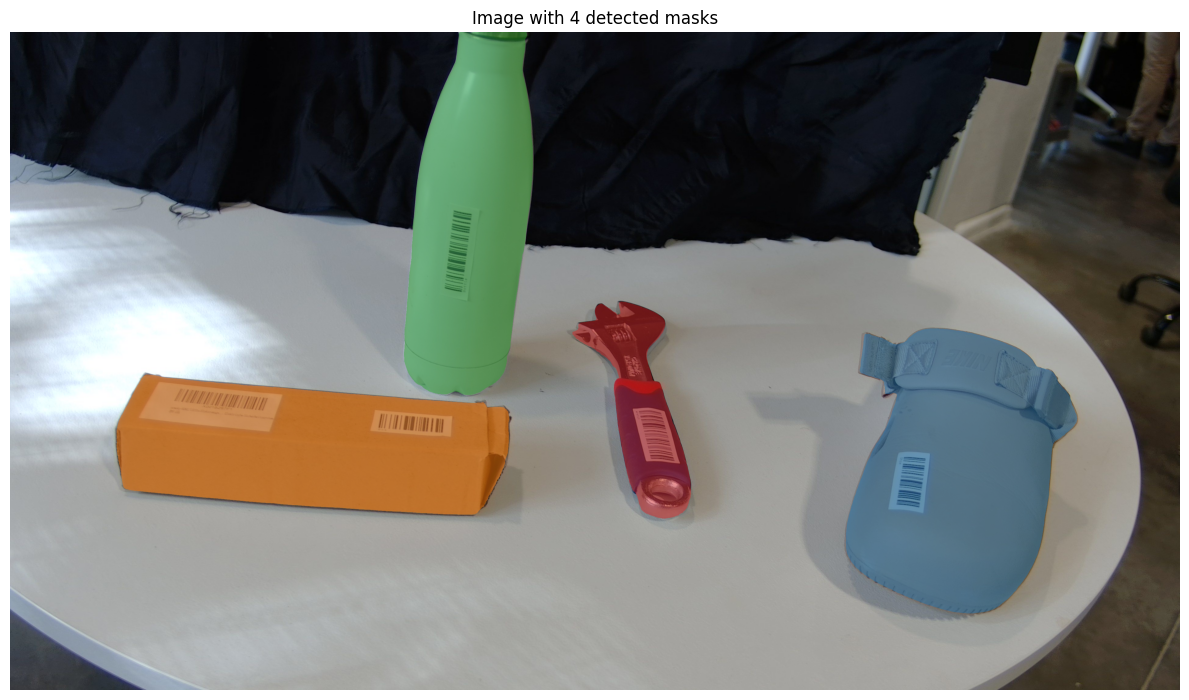

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Robustly convert masks (torch/numpy/list) to a (N,H,W) float numpy array in [0,1]
def _masks_to_numpy(masks):
    masks = masks.detach().to("cpu").numpy()
    masks_np = np.asarray(masks)
    masks_np = masks_np[:, 0, ...]
    masks_np = masks_np.astype(int)

    return masks_np


masks_np = _masks_to_numpy(masks)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(image)

for i, mask in enumerate(masks_np):
    H, W = mask.shape
    color = plt.cm.tab10(i % 10)  # RGBA in [0,1]
    colored = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.float32)
    colored[..., :3] = color[:3]
    colored[..., 3] = mask * 0.5  # per-pixel alpha

    ax.imshow(colored)

ax.set_title(f"Image with {len(masks_np)} detected masks")
ax.axis("off")
plt.tight_layout()
plt.show()

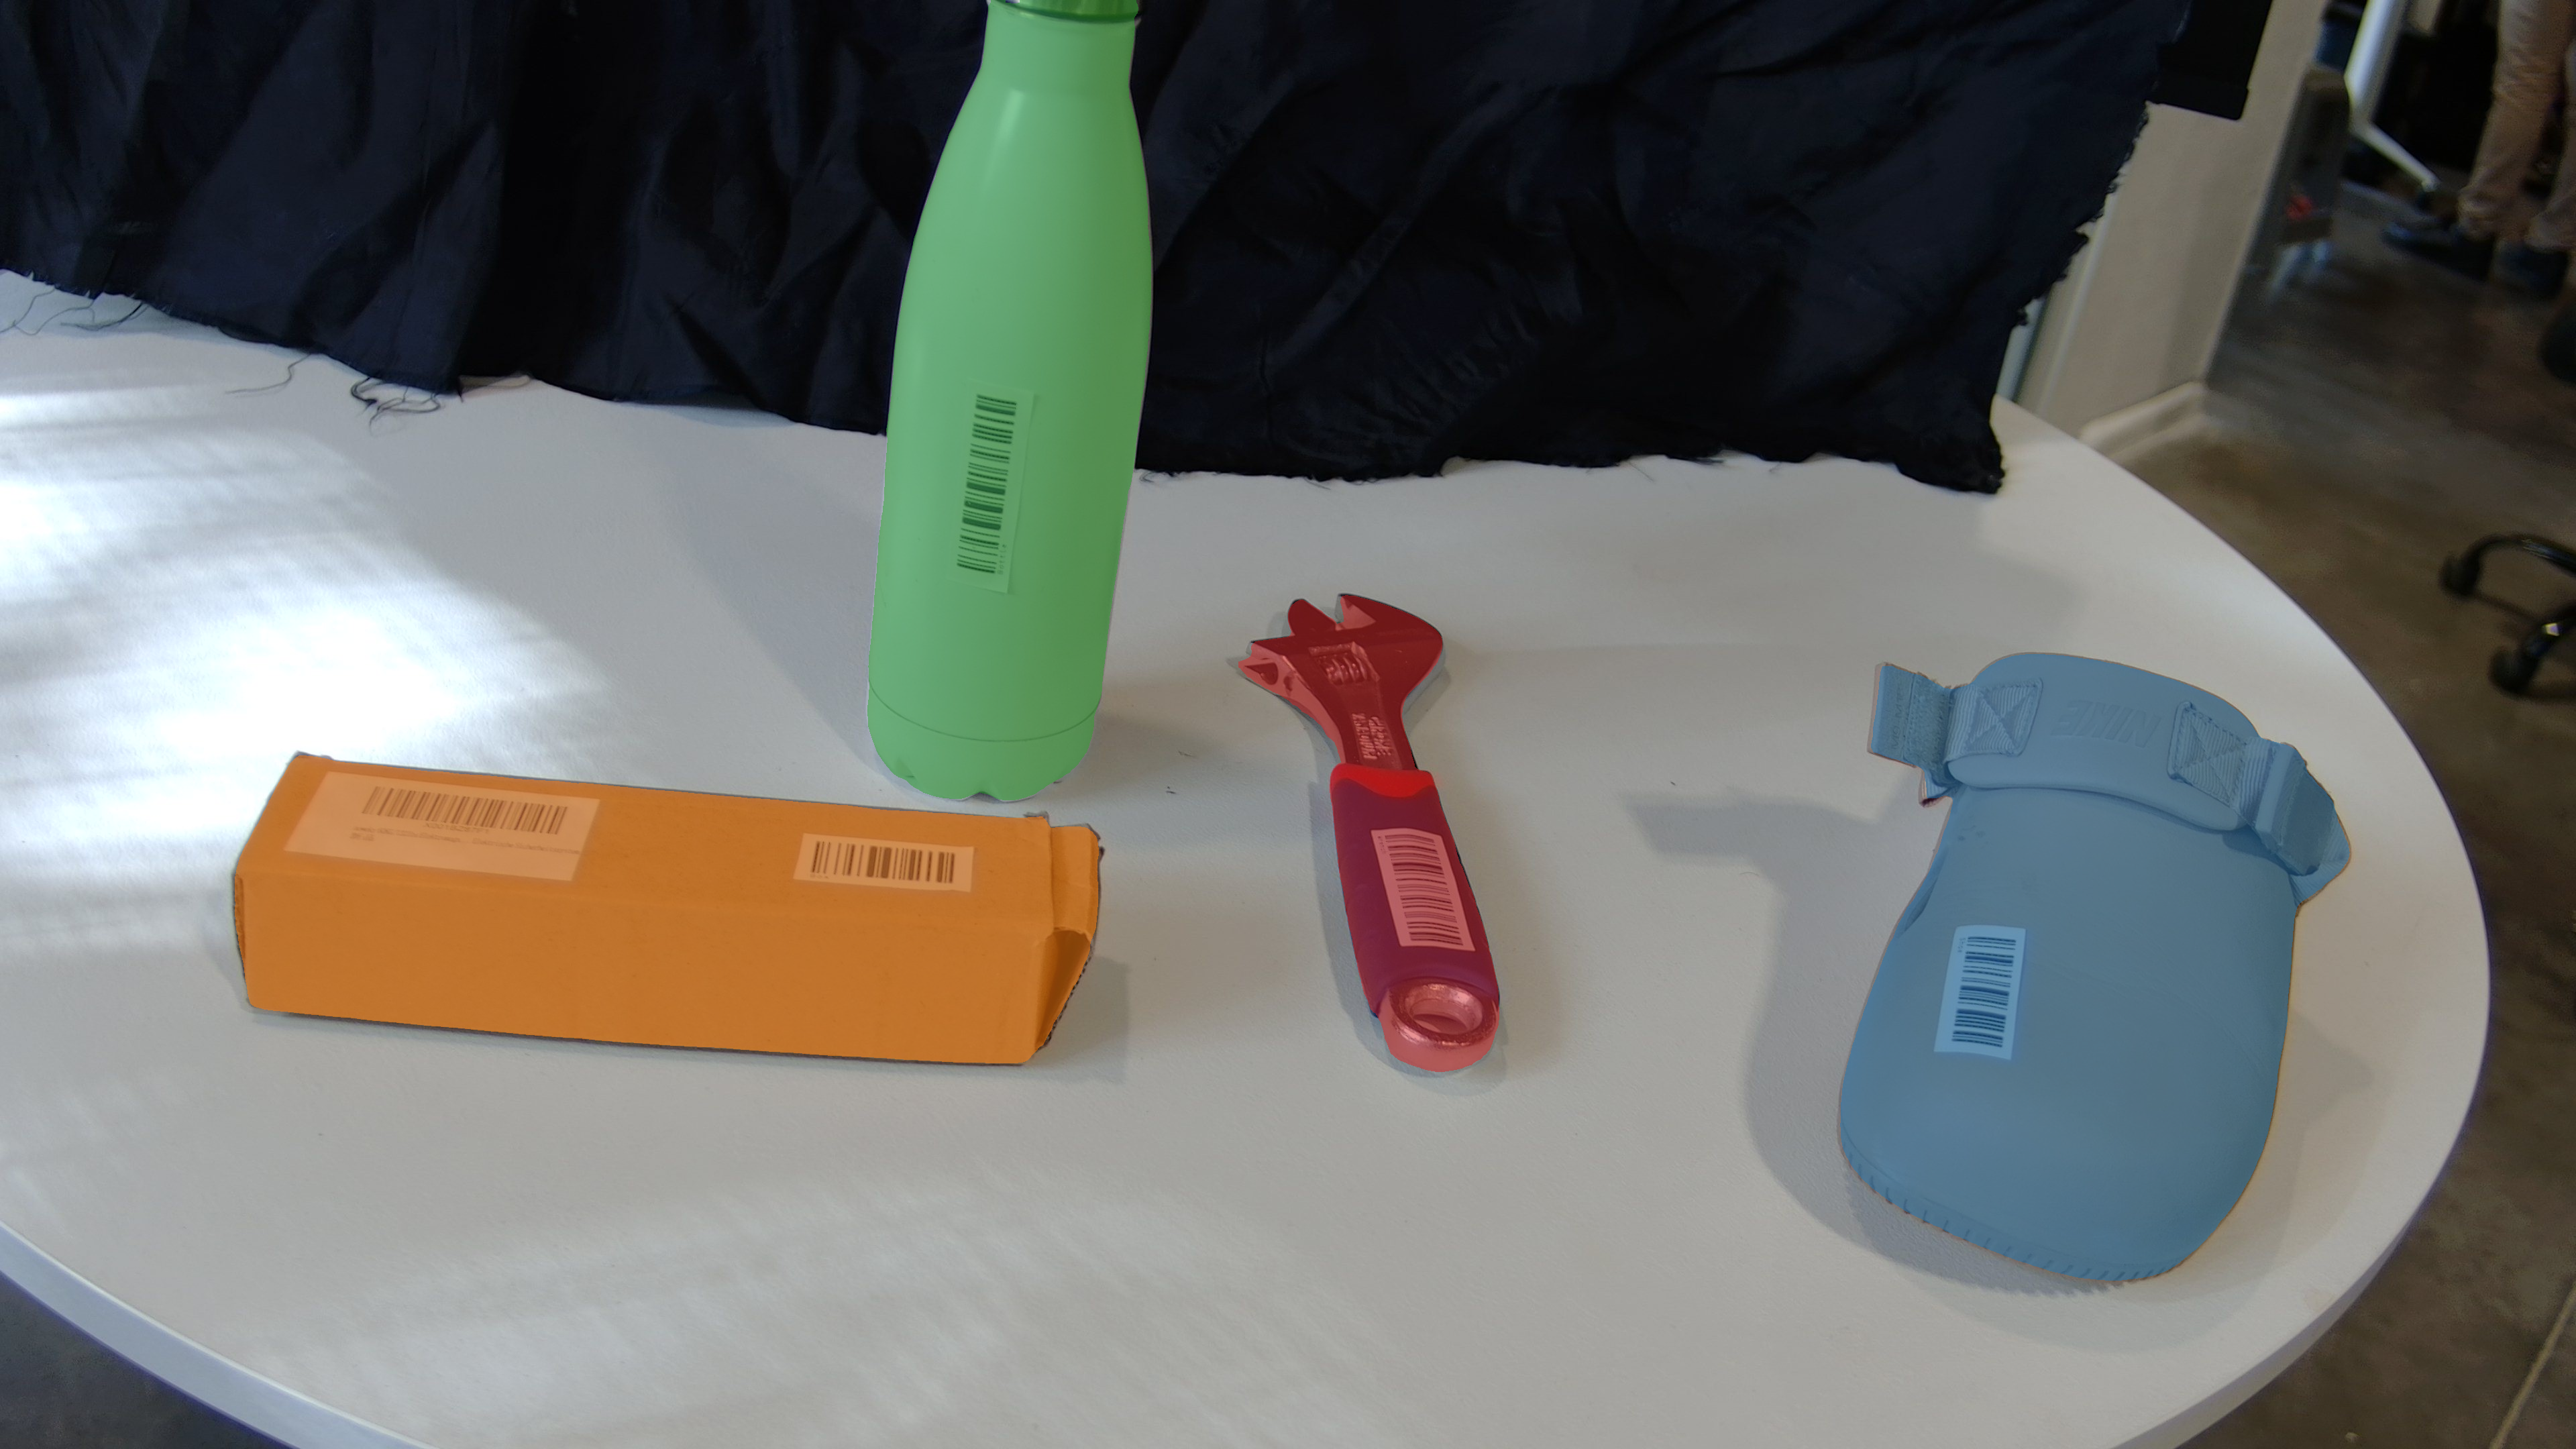